# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import regex as re
import random
import glob

# Data Preparation

In [2]:
import nltk
#nltk.download('gutenberg')
#nltk.download('punkt')

Importing Books downloaded from GutenBerg of Genre: Mystery and detective Fiction of differnt Authors

In [3]:
textFiles = glob.glob('Books/*.txt')

BookLabels = {}
for index, book in enumerate(textFiles):
    BookLabels[chr(65 + index)] = re.split(r"Books\\", book)[-1]
    
BookLabels

{'A': 'Adventures of Sherlock Holmes.txt',
 'B': 'Arsene Lupin.txt',
 'C': 'The Last Stroke.txt',
 'D': 'The Mysterious Affairs at Styles.txt',
 'E': 'The Red House Mystery.txt'}

In [4]:
np.random.seed(42)

labeledDocs = []
for index, filepath in enumerate(textFiles):
    # For each filepath in the list
    file = open(filepath, 'r',  encoding="utf8")
    text = file.read().replace('\n', ' ')
    file.close
    
    allSentenses = nltk.sent_tokenize(text)
    allWords = nltk.word_tokenize(text)
    allLabeledsDocs = []
    record = ''
    for sentence in allSentenses:
        record += ' ' + sentence
        if (len(nltk.word_tokenize(record)) >= 100):
            allLabeledsDocs.append([record,chr(65 + index)])
            record = '' # Empty the reocord
    # Check no of records with atleast 100 words in them
    # print(book,len(allLabeledDocs))
    if(len(allLabeledsDocs) > 200):
        labeledDocs += random.sample(allLabeledsDocs,200)
    

In [5]:
len(labeledDocs)

1000

# Distribution of no of words per record with full sentenses.

<AxesSubplot:xlabel='recordNum', ylabel='wordCount'>

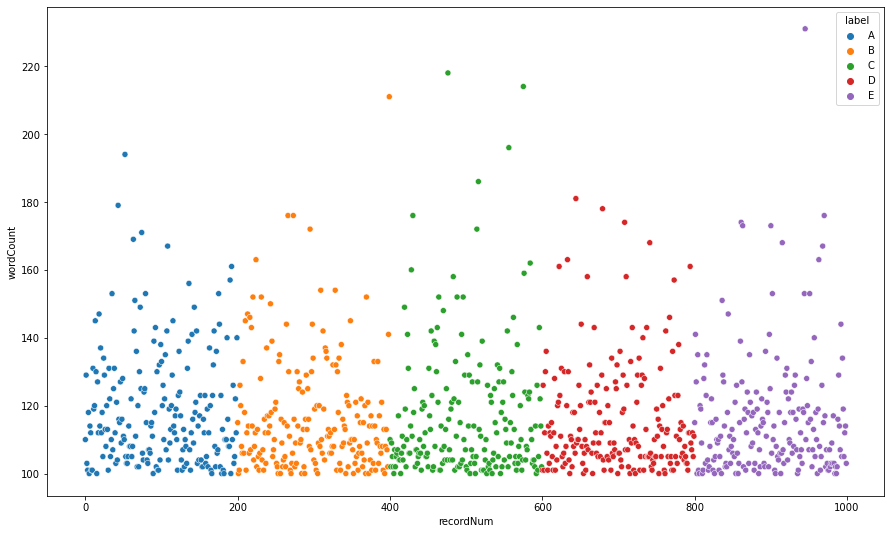

In [6]:
x,y,label =[],[],[]
for index, doc in enumerate(labeledDocs):
    x.append(index)
    y.append(len(nltk.word_tokenize(doc[0])))
    label.append(doc[1])

tempdf = pd.DataFrame({'recordNum':x, 'wordCount':y, 'label':label})

plt.figure(figsize=(15,9))
sns.scatterplot(x ='recordNum', y = 'wordCount', hue = 'label', data = tempdf)

# plt.figure(figsize=(15,9))
# sns.distplot(y, kde = True)

# Creating DataFrame

In [7]:
df = pd.DataFrame(labeledDocs,columns =['text','label'])
df.head()

,text,label
0,It was obvious at a glance that the story of ...,A
1,"Man, or at least criminal man, has lost all e...",A
2,I had no idea. And which king?” “The King of...,A
3,"You won’t shake hands before I go?” “Oh, cer...",A
4,It’s the big white one over yonder. There’s t...,A


# Preprocessing the Data

In [8]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

def textfilter(text):
    nopuncText = removePunctuations(text)
    filteredWords = [word for word in nltk.word_tokenize(nopuncText) if not word in stopwords.words()]
    return re.sub(r"\b\d+\b","",(" ".join(filteredWords)))
def removePunctuations(text):
    return re.sub(r'[^\w\s]','',text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhaskar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print('##############Before removing stop Words\n'+df.text[0])

df.text = df['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df.text[0])

##############Before removing stop Words
 It was obvious at a glance that the story of the fuller’s-earth was the merest fabrication, for it would be absurd to suppose that so powerful an engine could be designed for so inadequate a purpose. The walls were of wood, but the floor consisted of a large iron trough, and when I came to examine it I could see a crust of metallic deposit all over it. I had stooped and was scraping at this to see exactly what it was when I heard a muttered exclamation in German and saw the cadaverous face of the colonel looking down at me.

##############After removing stop words
It obvious glance story fullersearth merest fabrication would absurd suppose powerful engine could designed inadequate purpose The walls wood floor consisted large iron trough I came examine I could see crust metallic deposit I stooped scraping see exactly I heard muttered exclamation German saw cadaverous colonel looking


In [10]:
df.to_csv('filteredRecords.csv', index=False)

In [11]:
def countWords(text):
    return len(nltk.word_tokenize(text))

<AxesSubplot:ylabel='count'>

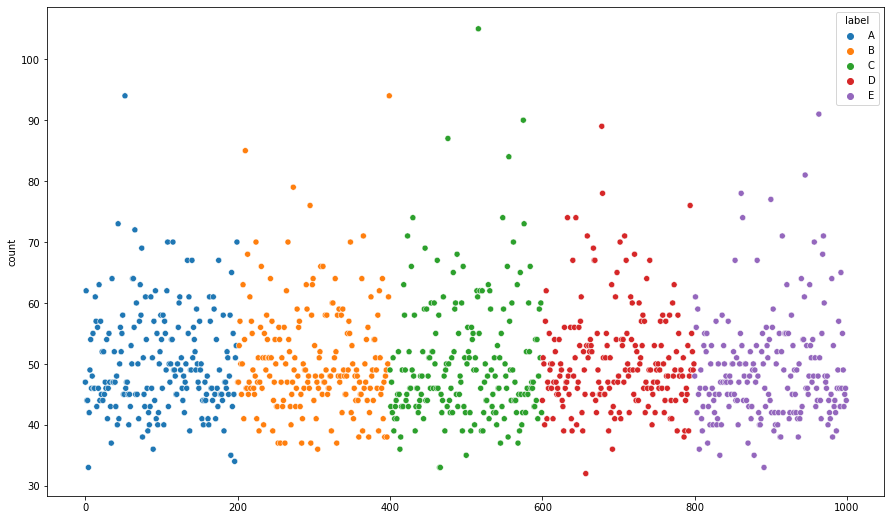

In [12]:
df['count'] = df['text'].apply(countWords)

plt.figure(figsize=(15,9))
sns.scatterplot(x =df.index, y = 'count', hue = 'label', data = df)


In [13]:
df.value_counts('label')

label
A    200
B    200
C    200
D    200
E    200
dtype: int64